## Stock Prediction using LSTM Model


## Get the Data

In the following cells we download and save the [S&P 500 dataset](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from google finance

In [1]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = "http://www.google.com/finance/historical?q={0}".format(symbol)
    url_string += "&startdate={0}&enddate={1}&num={0}&ei=KKltWZHCBNWPuQS9147YBw&output=csv".format(start.strftime('%b%d,%Y'), end.strftime('%b%d,%Y'),4000)
    
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [8]:
data = pd.read_csv('googl.csv','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017

<ipython-input-8-90ac38f9efc4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('googl.csv','2005-01-01','2017-06-30') # from January 1, 2005 to June 30, 2017


**Step 3:** Write the data to a csv file.

In [ ]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Date    Open    High     Low   Close   Volume
0  30-Jun-17  943.99  945.00  929.61  929.68  2287662
1  29-Jun-17  951.35  951.66  929.60  937.82  3206674
2  28-Jun-17  950.66  963.24  936.16  961.01  2745568
3  27-Jun-17  961.60  967.22  947.09  948.09  2443602
4  26-Jun-17  990.00  993.99  970.33  972.09  1517912


Open   --- mean : 382.51416852146383   	 Std:  213.48651683323408   	 Max:  1005.49   	 Min:  87.74
High   --- mean : 385.87209856915837   	 Std:  214.60229511464593   	 Max:  1008.61   	 Min:  89.29
Low    --- mean : 378.7371255961842   	 Std:  212.08010983015183   	 Max:  996.62   	 Min:  86.37
Close  --- mean : 382.3502480127191   	 Std:  213.43595872312488   	 Max:  1004.28   	 Min:  87.58
Volume --- mean : 4205707.889666136   	 Std:  3877483.007730211   	 Max:  41182889   	 Min:  521141


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [3]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item    Open   Close    Volume
0     0   98.80  101.46  15860692
1     1  100.77   97.35  13762396
2     2   96.82   96.85   8239545
3     3   97.72   94.37  10389803
4     4   95.42   97.02   9666175
---
      Item    Open   Close   Volume
3140  3140  990.00  972.09  1517912
3141  3141  961.60  948.09  2443602
3142  3142  950.66  961.01  2745568
3143  3143  951.35  937.82  3206674
3144  3144  943.99  929.68  2287662


**Step 2: ** Visualise raw data.

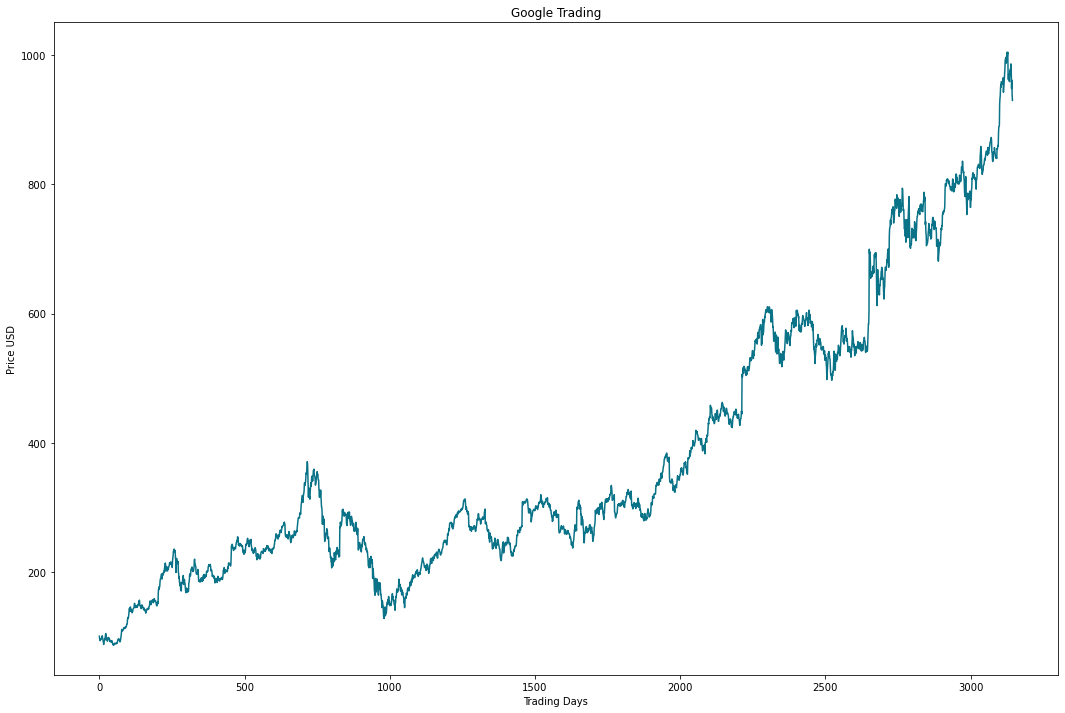

In [4]:
import visualize

visualize.plot_basic(stocks)

**Step 3 :** Normalise the data using minmaxscaler function

In [5]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.012051  0.015141  0.377248
1     1  0.014198  0.010658  0.325644
2     2  0.009894  0.010112  0.189820
3     3  0.010874  0.007407  0.242701
4     4  0.008368  0.010298  0.224905


Open   --- mean : 0.3211922293886812   	 Std:  0.23261946808306658   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.3215558503465895   	 Std:  0.23283076112482215   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.09061506381049182   	 Std:  0.09535947661989863   	 Max:  0.9999999999999999   	 Min:  0.0


**Step 4 :** Visualize the data again

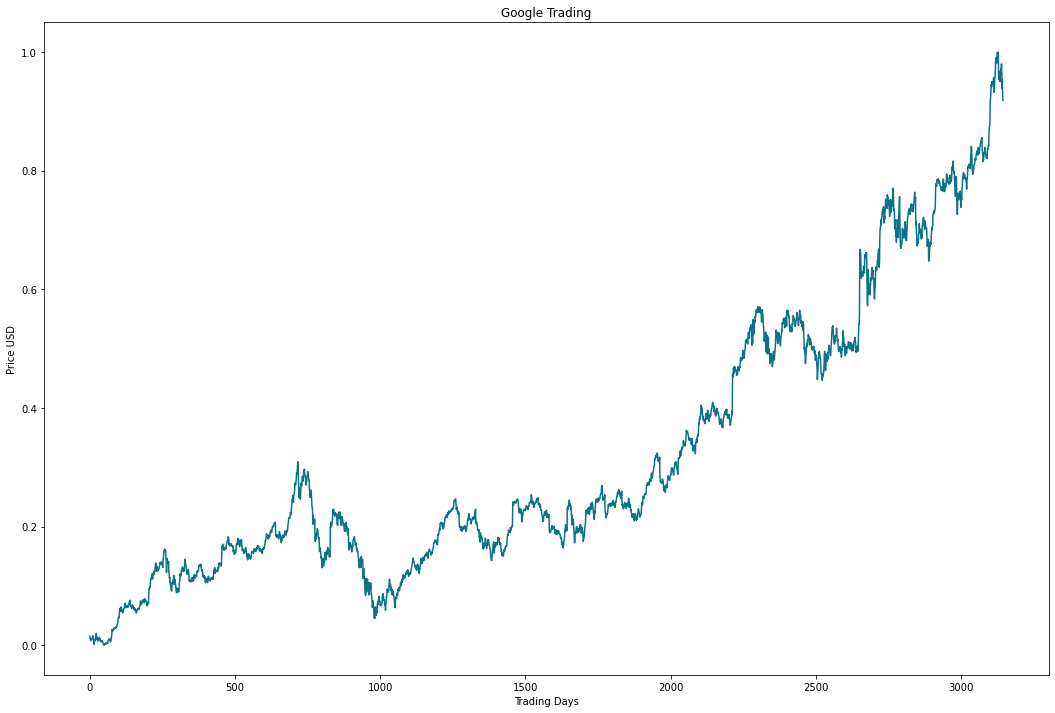

In [6]:
visualize.plot_basic(stocks)

**Step 5:** Log the normalised data for future resuablilty

In [7]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [8]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.012051,0.015141,0.377248
1,1,0.014198,0.010658,0.325644
2,2,0.009894,0.010112,0.189820
3,3,0.010874,0.007407,0.242701
4,4,0.008368,0.010298,0.224905


**Step 2:** Split data into train and test pair

In [9]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2155, 1)
y_train (2155, 1)
x_test (990, 1)
y_test (990, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [10]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [11]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

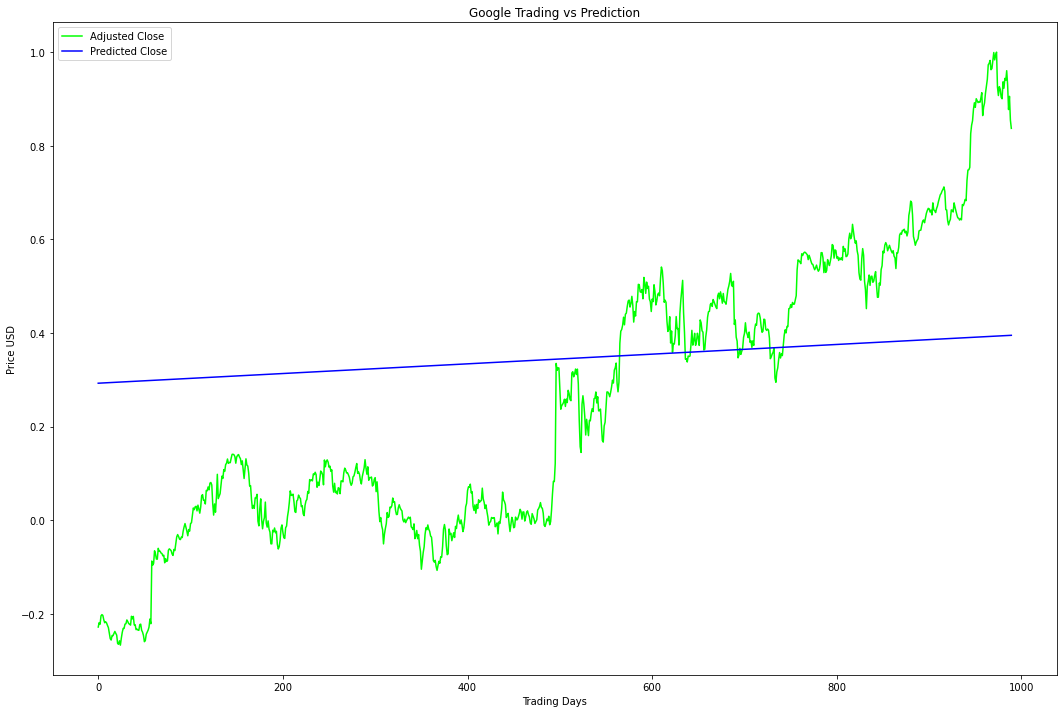

In [12]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [13]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.1852 MSE (0.4303 RMSE)
Test Score: 0.08133781 MSE (0.28519784 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [14]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.012051,0.015141,0.377248
1,0.014198,0.010658,0.325644
2,0.009894,0.010112,0.189820
3,0.010874,0.007407,0.242701
4,0.008368,0.010298,0.224905


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [15]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2589, 50, 3)
y_train (2589,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [16]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0055043697357177734


**Step 4:** Train the model

In [17]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

77/77 [==============================] - 72s 694ms/step - loss: 0.0110 - val_loss: 2.9471e-04


**Step 5:** make prediction using test data

In [18]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

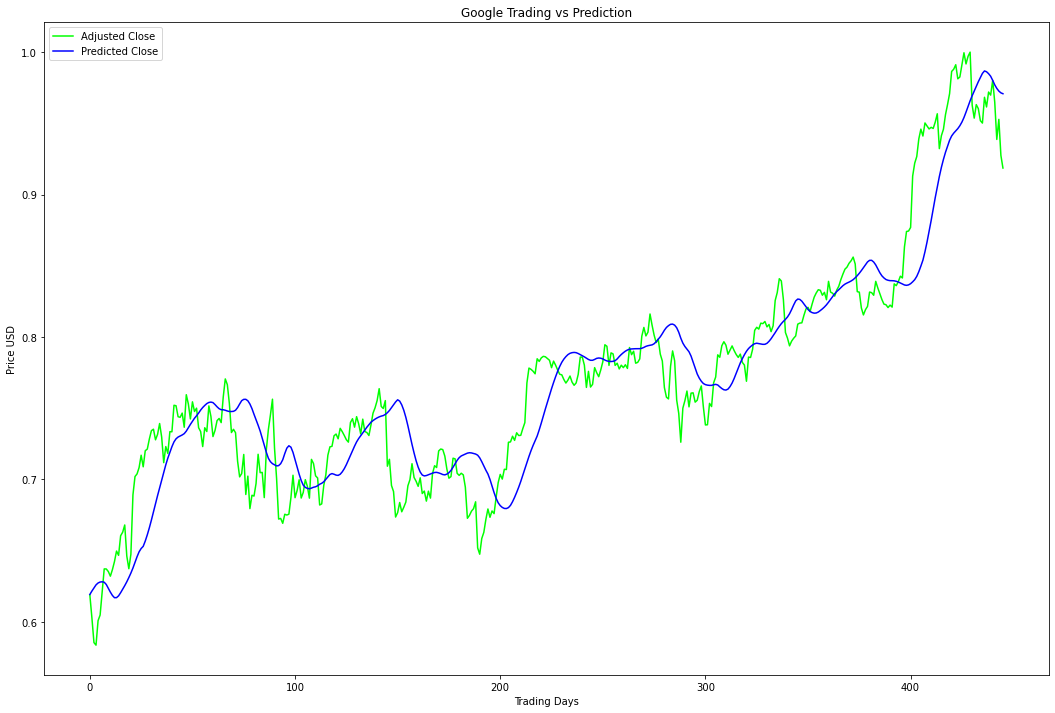

In [19]:
vs.plot_lstm_prediction(y_test,predictions)

** Step 7:** Get the test score.

In [20]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00035911 MSE (0.01895025 RMSE)
Test Score: 0.00094715 MSE (0.03077573 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [21]:
# Set up hyperparameters
batch_size = 100
epochs = 5

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0030035972595214844


**Step 2: ** Train improved LSTM model

In [22]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/5
25/25 - 24s - loss: 0.0104 - val_loss: 8.9267e-04
Epoch 2/5
25/25 - 18s - loss: 0.0010 - val_loss: 8.7105e-04
Epoch 3/5
25/25 - 16s - loss: 7.2244e-04 - val_loss: 2.7693e-04
Epoch 4/5
25/25 - 16s - loss: 7.0736e-04 - val_loss: 2.7977e-04
Epoch 5/5
25/25 - 16s - loss: 7.0098e-04 - val_loss: 3.0407e-04


**Step 3:** Make prediction on improved LSTM model

In [23]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

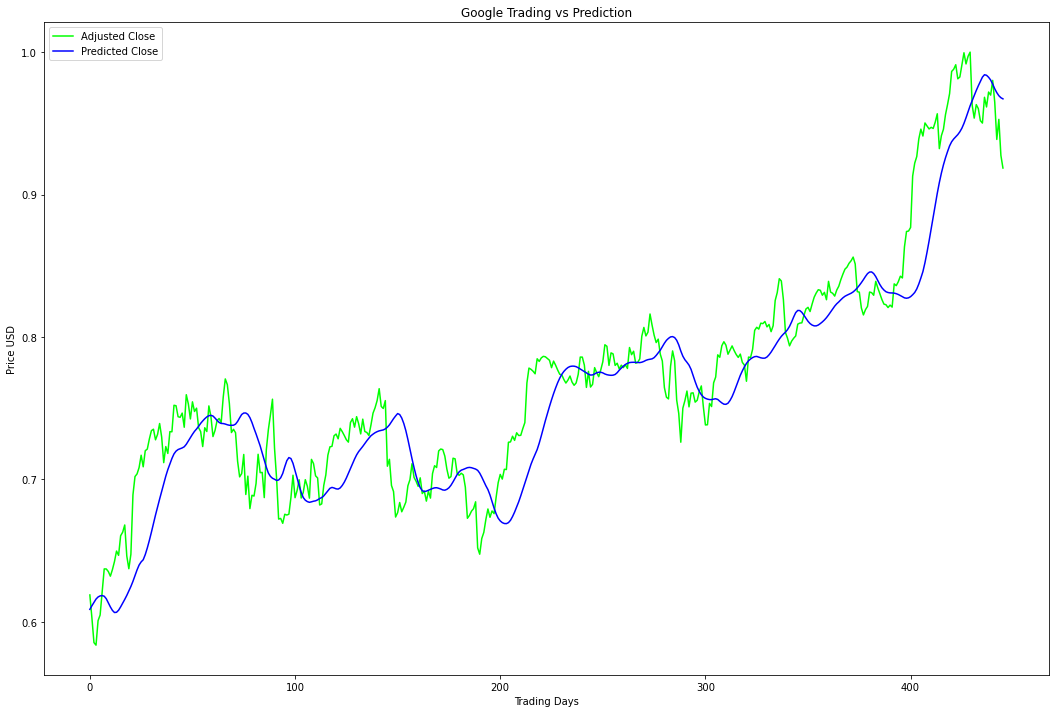

In [24]:
vs.plot_lstm_prediction(y_test,predictions)

**Step 5:** Get the test score

In [25]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00032708 MSE (0.01808524 RMSE)
Test Score: 0.00104308 MSE (0.03229673 RMSE)


In [26]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta) 

Delta Price: 0.001043 - RMSE * Adjusted Close Range


# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [28]:
import preprocess_data as ppd

data = pd.read_csv('googl.csv')

stocks = ppd.remove_data(data)

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]

print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

       Open     Close    Volume
0  0.123901  0.000000  0.606442
1  0.000000  0.174601  1.000000
2  0.010989  0.112263  0.921928
3  0.093132  0.291229  0.575381
4  0.243819  0.430228  0.366556
(12, 1, 3)
(12,)
Test Score: 0.3873 MSE (0.6224 RMSE)


In [29]:
from numba import cuda
cuda.select_device(0)
cuda.close()